Визначити фрактальну розмірність фрактала на площині, що складається з 
точок (𝑥; 𝑦), де 𝑥 ∈ [0; 1], 𝑦 ∈ [0; 1], причому в системі числення за основою 
5 в записі числа 𝑥 відсутні цифри 1 та 3, а в записі числа 𝑦 відсутні цифри 0, 2 
та 4.

In [109]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [110]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [111]:
def num_to_base_5_str(n):
    return "".join(str(i) for i in numberToBase(n, 5))

In [112]:
for i in range(10):
    print(num_to_base_5_str(i))

0
1
2
3
4
10
11
12
13
14


In [113]:
def redo_array(array, out_array=None, *args):
    if len(array.shape) == 2:
        if out_array is None:
            out_array = array
            return out_array
        else:
            return np.concatenate((out_array, array), axis=1)
        
    for i in range(array.shape[0]):
        if len(args) < 1 and out_array is None:
            out_array = redo_array(array[i], out_array, *args, i)
        elif len(args) == 1:
            out_array = redo_array(array[i], out_array, *args, i)
        else:
            out_array = np.concatenate((out_array, redo_array(array[i], None, *args, i)), axis=0)
    return out_array

def create_fractions(iterations):
    matrix = np.ones((1, 1))
    scale = 1
    fig, ax = plt.subplots(iterations+1, figsize=(20, 8*iterations))
    ax[0].imshow([matrix], cmap='gray')
    ax[0].set_title(f"Ітерація №{0}")
    for it in range(1, iterations+1):
        
        matrix = np.array([[0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], 
                           [0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix]])
        # matrix = np.array([[matrix, matrix, matrix],
        #                    [matrix, 0*matrix, matrix],
        #                    [matrix, matrix, matrix]])
        if it >= 2:
            if it == 2:
                temp = matrix.reshape(matrix.shape[:-2])
                temp = redo_array(temp)
            else:
                temp = redo_array(matrix)
            
            matrix = temp
            temp = 1-temp
            ax[it].imshow(temp, cmap='gray')
            unique, counts = np.unique((1 - temp), return_counts=True)
            # dim = math.log(dict(zip(unique, counts))[1])/math.log(matrix.size)
            dim = math.log(dict(zip(unique, counts))[1], matrix.size)
            ax[it].set_title(f"Ітерація №{it}, fractal dim: {np.floor(dim)} <= {dim} <= {np.ceil(dim)}")
        else:
            matrix_to_show = 1-np.reshape(matrix, (matrix.shape[0]**it, matrix.shape[1]**it))
            ax[it].imshow(matrix_to_show, cmap='gray')
            unique, counts = np.unique((1 - matrix_to_show), return_counts=True)
            # dim = math.log(dict(zip(unique, counts))[1])/math.log(matrix.size)
            dim = math.log(dict(zip(unique, counts))[1], matrix.size)
            ax[it].set_title(f"Ітерація №{it}, fractal dim: {np.floor(dim)} <= {dim} <= {np.ceil(dim)}")

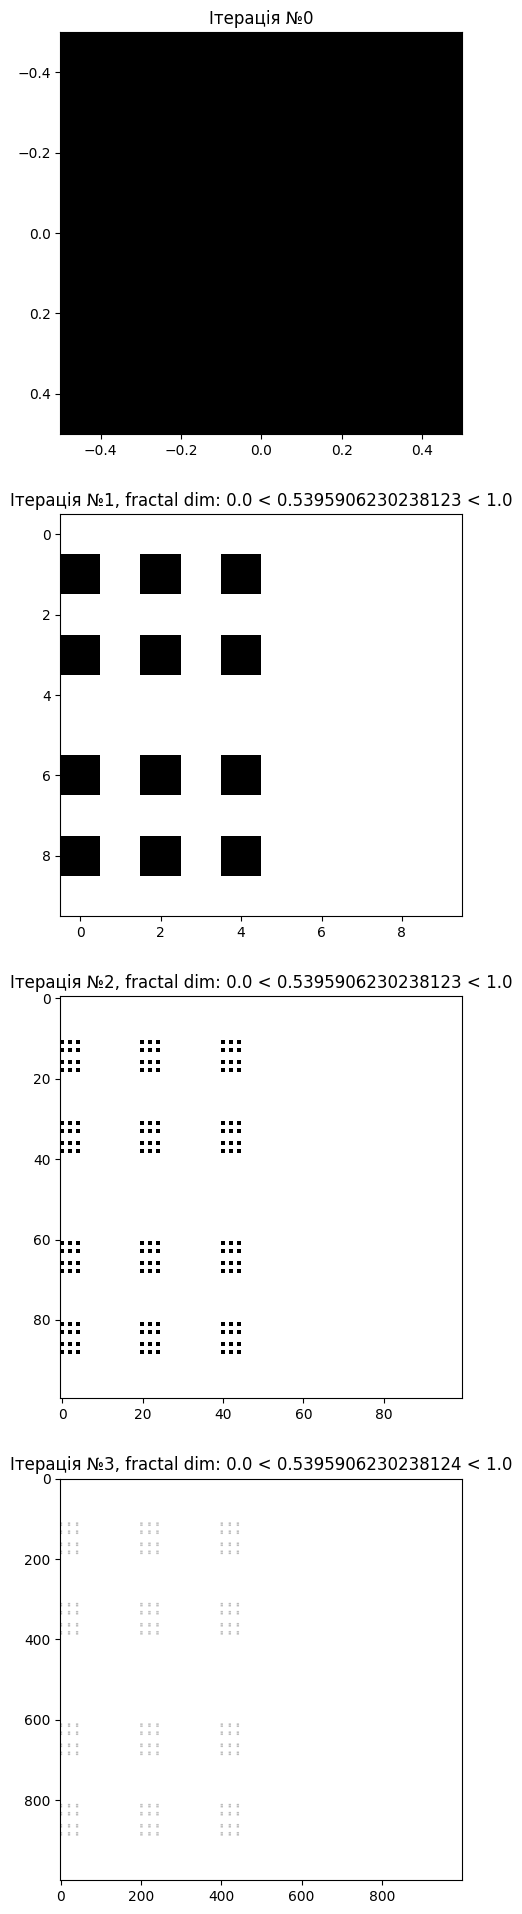

In [114]:
create_fractions(3)